# ACV Course

## Overview :
Main goal of the course: learn how to manipulate and analyse images OpenCV, focused on skills needed for computer vision outside of machine learning methods.

We start by 2 days on image processing and manipulation :
- Day 1 : Basics of image processing in OpenCV
- Day 2 : Advanced image manipulation

## Program for today

### Morning: Interactive course
* Image input/output
* Manipulating pixels
* Color spaces
* Blurring images
* Edge detection
* Morphological operations
* Thresholding

### Afternoon: Start of the project
**General goal**

Build a webcam filter app like PhotoBooth on Mac OS (demo)

**Today's goals**

Develop some filters:
* Mirror
* Glow
* Sepia
* Black and white
* X-Ray
* Cartoon
* Bonus: Drawing
* Bonus: Thermal camera

## Why OpenCV

* OpenCV = Open Computer Vision Library
* Vision, image & video processing, and machine learning libraries rolled into one
* Multiplatform and multilanguage
* Free and open source
* Used by basically everyone working on Computer Vision

**Applications**

* Tracking and identifying objects (including humans)
* Tracking camera motion
* 3D model reconstruction
* Search by image
* And much more

**Examples of industrial use cases**
* Stitching streetview images together
* Monitoring mine equipment in China 
* Helping robots navigate and pick up objects at Willow Garage
* Detection of swimming pool drowning accidents in Europe
* Running interactive art in Spain and New York
* Checking runways for debris in Turkey
* Inspecting labels on products in factories around the world
* Rapid face detection in Japan

http://opencv.org/about.html

### Useful ressources

Tutorials:
http://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html

Reference:
http://docs.opencv.org/2.4/index.html


Community:
http://stackoverflow.com/questions/tagged/opencv

## Preparation

We will use Colab and we will need to download and unzip some files that we will use along the course.

Colab does not keep the files between sessions, so you will probably need to redownload it each time.

In [1]:
%%capture
!unzip -o data.zip

Essential utility commands

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]  # Make inline plots larger

import numpy as np
import cv2

Because we are using Colab, we will need a patch to diplay images

from google.colab.patches import cv2_imshow

cv2.imshow = lambda title,im: cv2_imshow(im)

## Image input/output 
### Reading and displaying image with numpy/matplot

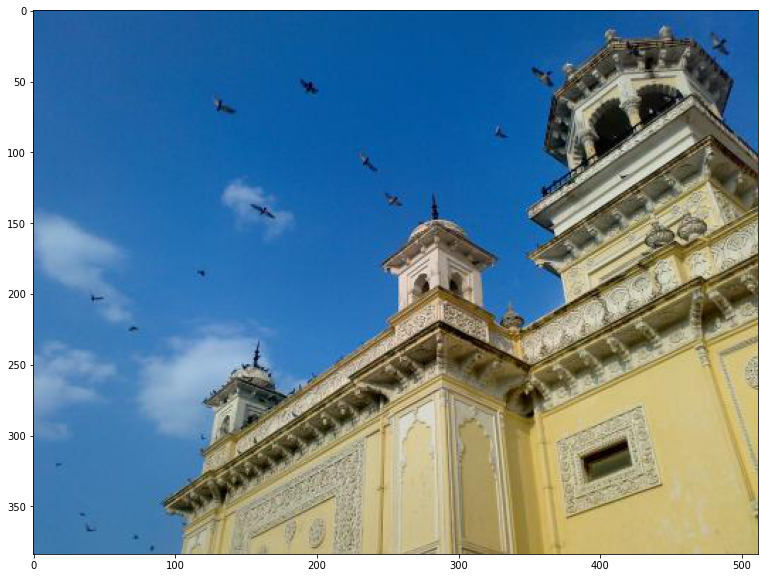

In [3]:
im2disp = plt.imread('data/home.jpg')
plt.figure()
plt.imshow(im2disp)

### Now the OpenCV way

In [4]:
cvim2disp = cv2.imread('data/home.jpg')
cv2.imshow('HelloWorld', cvim2disp)

### Are numpy.imshow and cv2.imshow the same?

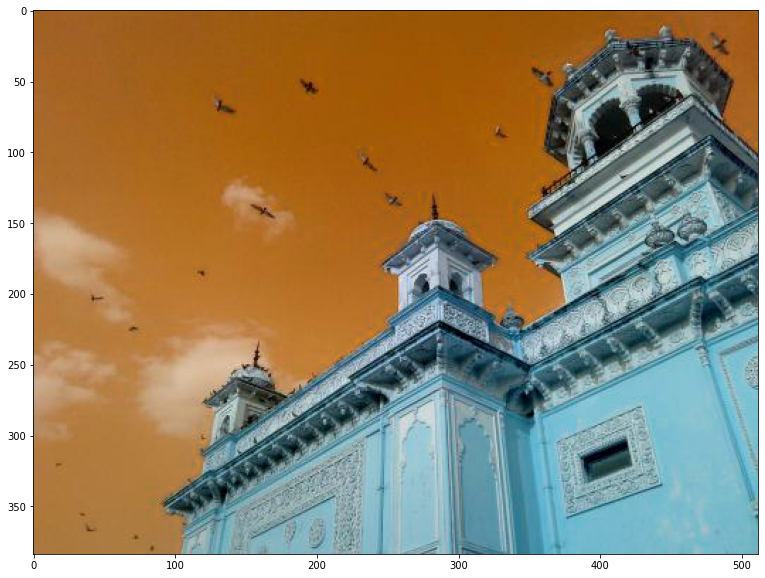

In [5]:
plt.figure()
plt.imshow(cvim2disp)

**What happened??**

For historical reasons, OpenCV defaults to BGR format instead of usual RGB

**Solutions:**

Use numpy/OpenCV consistently

or make sure to convert

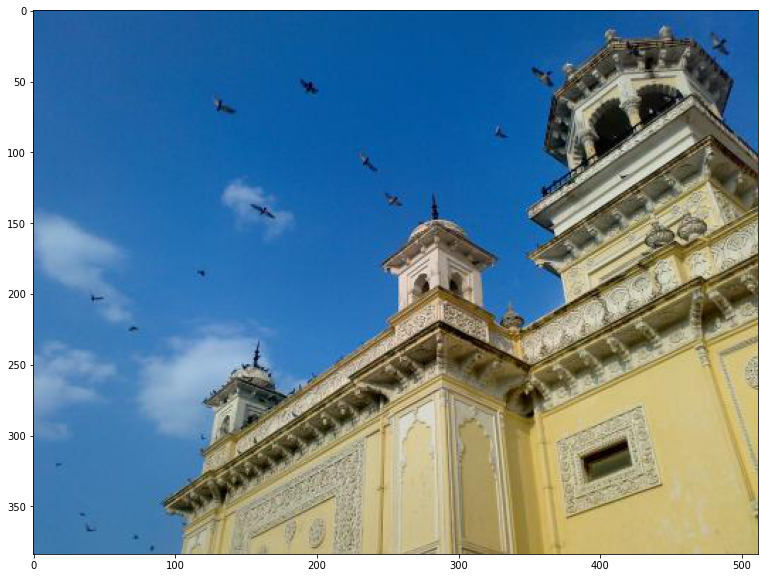

In [6]:
cvimrgb = cv2.cvtColor(cvim2disp,cv2.COLOR_BGR2RGB)

#or
#imbgr = cv2.cvtColor(im2disp,cv2.COLOR_RGB2BGR)

plt.figure()
plt.imshow(cvimrgb)

### Other color spaces (HSL, HSV, etc.)

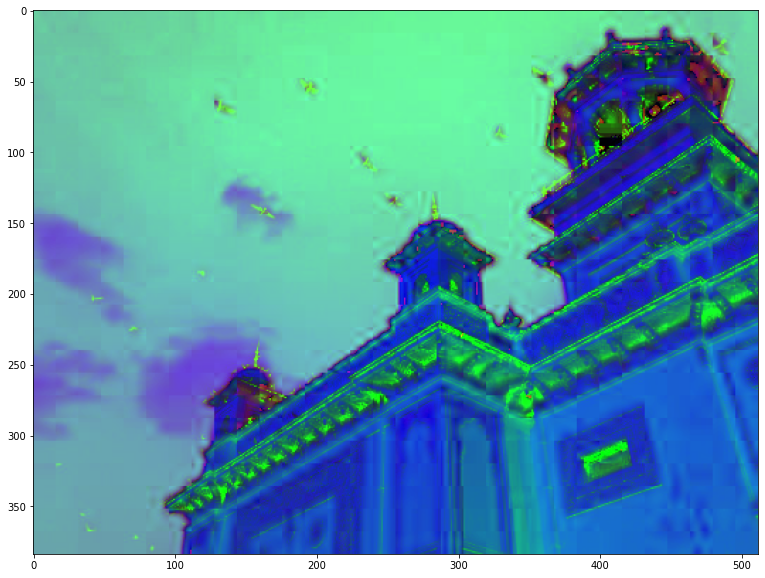

In [7]:
cvimhsv = cv2.cvtColor(cvim2disp,cv2.COLOR_BGR2HSV)

plt.figure()
plt.imshow(cvimhsv)

**Why does it look like this?**

HSV = Hue, Saturation, Value

https://en.wikipedia.org/wiki/HSL_and_HSV


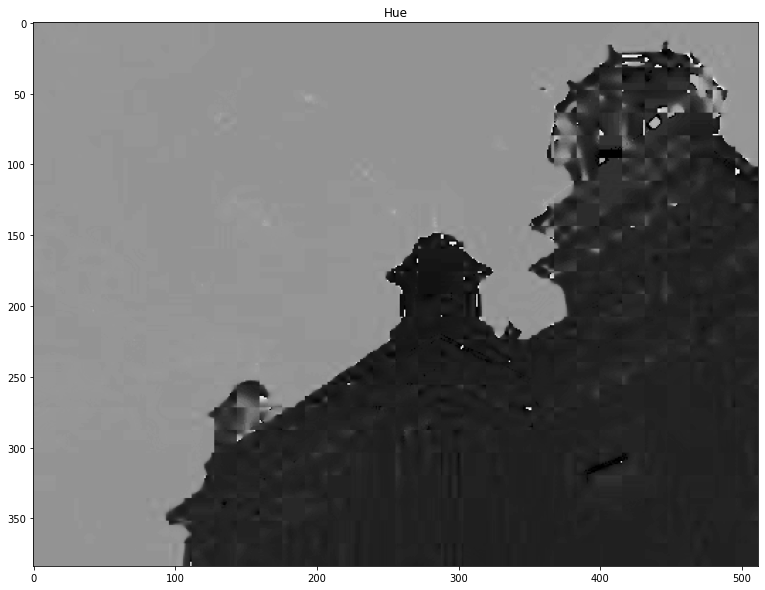

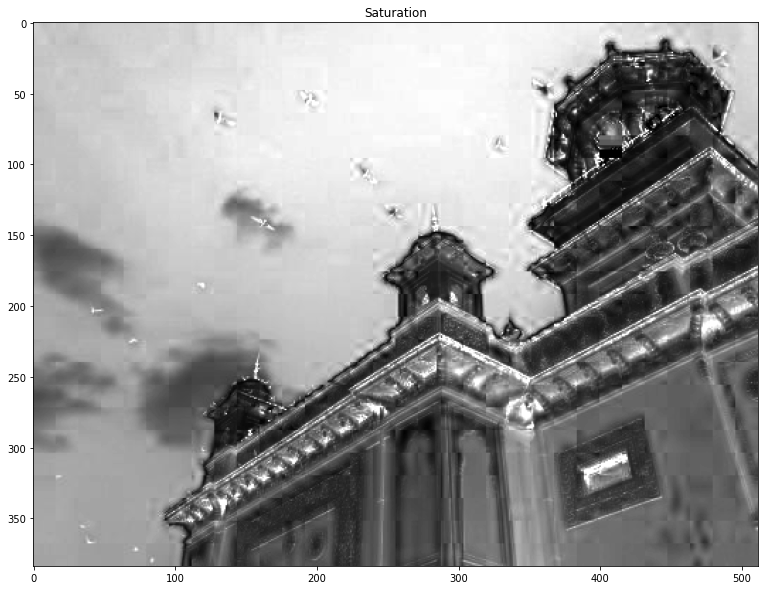

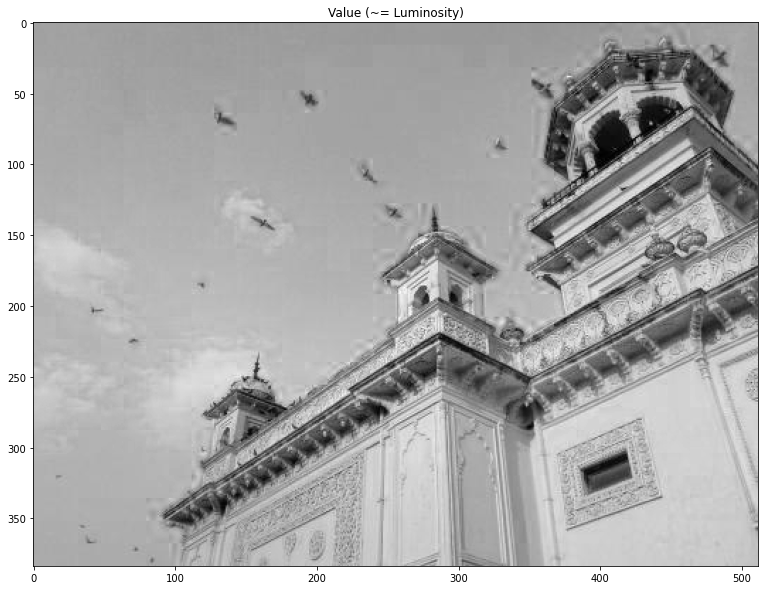

In [8]:
plt.figure()
plt.title('Hue')
plt.imshow(cvimhsv[:, :, 0], cmap='gray')

plt.figure()
plt.title('Saturation')
plt.imshow(cvimhsv[:, :, 1], cmap='gray')

plt.figure()
plt.title('Value (~= Luminosity)')
plt.imshow(cvimhsv[:, :, 2], cmap='gray')

### Simple filtering example

In [10]:
im2disp = plt.imread('data/home.jpg')

blurred = cv2.GaussianBlur(im2disp,(19,19),0)

plt.figure()
plt.imshow(blurred2)

NameError: name 'blurred2' is not defined

<Figure size 1080x720 with 0 Axes>

A more general method

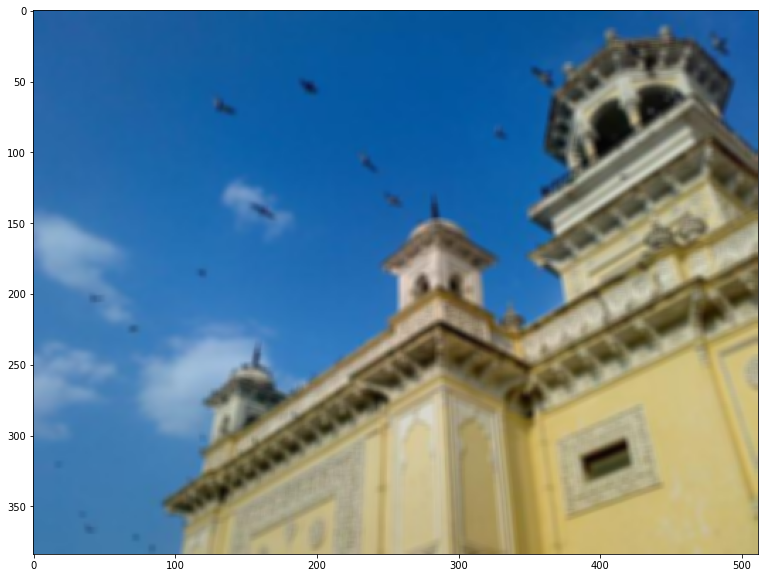

In [11]:
kernel = np.ones((5,5),np.float32)/25
blurred2 = cv2.filter2D(im2disp,-1,kernel)

plt.figure()
plt.imshow(blurred2)

### Saving an image

In [12]:
cv2.imwrite('mycvimage.png', cvim2disp)
#or
plt.imsave('myimage.png', im2disp)

### Bonus: 1 numpy gotcha for people coming from Matlab

In [13]:
x = zeros(5)
y = x

y[1] = 1

x

NameError: name 'zeros' is not defined

**What happened? Why did modifying y change x?**

A: Python copies arrays and other mutable data types by reference by default

Here's what you probably want:

In [14]:
x = zeros(5)
y = x.copy()

y[1] = 1

x

NameError: name 'zeros' is not defined

##Essential Numpy for OpenCV image work

Let's load a nice picture

In [ ]:
bfly = plt.imread('data/butterfly.jpg')

plt.figure()
plt.imshow(bfly)

Many algorithms operate on grayscale, and grayscale is easier to work on

In [15]:
bflygray = cv2.cvtColor(bfly,cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(bflygray)

NameError: name 'bfly' is not defined

You may or may not want the default rainbow map

In [16]:
plt.figure()
plt.imshow(bflygray, cmap='gray')

NameError: name 'bflygray' is not defined

<Figure size 1080x720 with 0 Axes>

Let's make sure we understand our data

In [17]:
print(bfly.shape)
print(bflygray.shape)

NameError: name 'bfly' is not defined

The format above is (height, width, numchannels):

* If numchannels = 1, as is for grayscale, it is omitted

* For RGB/BGR/HSV color images, numchannels=3

* You could have numchannels=4; this happens for RGBA (Red, Green, Blue, Alpha) images, where Alpha is transparency
  * transparent = 0
  * opaque = 1.0 or 255 (depending on your datatype)

Also remember how to get the data type

In [ ]:
bfly.dtype

uint8, which means integers in the 0-255 range, is standard for everyday camera images

For scientific purposes, floating point is often used. We typically want these in the 0-1 range:

In [ ]:
bflyfloat = bflygray.astype(double) / 255.0

bflyfloat.dtype

Going back to dimensions, how do we get the image width and height in convenient variables?

In [ ]:
height, width = bflygray.shape[0:2]

height, width

**Always remember that the y dimension comes first**

=> height is before width

**When indexing, [0:2] is only 0 and 1, not 0,1,2**

Python uses a 0:N-1 convention, which is handy when you get used to it, but can trip up newcomers

**What would you expect the following to do?**

In [ ]:
print(np.arange(5))

Also, you might see something like this in people's code

In [ ]:
height, width = bflygray.shape[:2]

height, width

It works just the same; when you leave an index blank, it's assumed to be the first or last element, depending on whether it's on the left or right of the : char

In [ ]:
bfly.shape[:]

Also useful to know how to access the last, second to last etc elements

In [ ]:
print(bfly.shape[-1])
print(bfly.shape[-2])
print(bfly.shape[-3])

You can probably guess how to extract RGB channels:

In [ ]:
redc = bfly[:,:,0]
greenc = bfly[:,:,1]
bluec = bfly[:,:,2]

Note that these will all be singleton in the numchannels dimension

In [ ]:
bluec.shape

**How to recombine?**

First create a new blank image of the proper dimensions

Be careful that the dimensions are given as a tuple rather than individual arguments

In [ ]:
combined = np.zeros((height,width,3), uint8)

combined[:,:,0] = redc
combined[:,:,1] = greenc
combined[:,:,2] = bluec

plt.figure()
plt.imshow(combined)

It's easy to extract a region of interest from an image

Let's say we want to examine the butterfly's head more closely;

We can get a bounding box from the figure above

In [ ]:
bflyhead = bfly[70:100,210:250]

plt.figure()
plt.imshow(bflyhead)

Writing to pixels is also simple:

In [ ]:
bflyedit = bfly.copy()
bflyedit[70:100,210:250] = 0

plt.figure()
plt.imshow(bflyedit)

Suggested test-your-knowledge exercises:
1.  Take an image and write a big + sign over it (ie two blocks of black pixels; one extending from top to bottom, one from left to right, but not occupying the whole image)
2.  Create a function that will take in two images and return an image that combines them into a larger side-by-side image
Should be something like


In [ ]:
def sidebyside(imageleft,imageright):
    newimheight = ...
    newimwidth = ...
    newim = plt.zeros(...)
    ...
    ...
    ...
    return newim

#note this won't run as-is

### Numpy addition vs OpenCV addition

Numpy does modular addition (ie 250+10 = 4, assuming uint8)

OpenCV saturates

In [ ]:
x = np.uint8([250])
y = np.uint8([10])

cv2.add(x,y)

This tends to be what you want for combining images

cv2.subtract works similarly

Of course, images will have to be the same dimension for addition/subtraction to work


### Image weighted blending

Make sure alpha values (or image weights) sum to 1, if you want to "conserve brightness"

alpha for pic1 = 0.7

alpha for pic2 = 1 - 0.7 = 3


In [ ]:
pic1 = plt.imread('data/pic1.png')
pic2 = plt.imread('data/pic2.png')

dst = cv2.addWeighted(pic1, 0.7, pic2, 0.3, 0)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(pic1)
plt.subplot(1,3,2)
plt.imshow(pic2)
plt.subplot(1,3,3)
plt.imshow(dst)

## Image filtering in OpenCV

### Lowpass filtering

In [ ]:
baboon = imread('data/baboon.jpg')
babblur = cv2.GaussianBlur(baboon, (29,29), 0)

#custom kernel; simple box-car in this case
kernel = np.ones((15,15), np.float32)
kernel /= kernel.size #normalize kernel so as not to scale image intensity

babblur2 = cv2.filter2D(baboon, -1, kernel)

figure()
subplot(1,3,1)
imshow(baboon)
title('original')
subplot(1,3,2)
imshow(babblur)
title('Gaussian blurred')
subplot(1,3,3)
imshow(babblur2)
title('Box-car blurred')

Filter2D is very general and can do many different things; with the right kernel

You can just as easily do high-pass filtering

### Median blurring

Smoothing filter while preserving edges

In [ ]:
t = linspace(-1.0,1,1000)
y =  200* (exp(-(t/0.3)**20)  )
yn = y + 200*random.normal(scale=0.01,size=t.shape)
yn[yn<0]=0
y = y.astype(uint8)
yn = yn.astype(uint8)

plt.figure()
plt.plot(t, y)
 
plt.plot(t, yn)
 
ygb = cv2.GaussianBlur(y,(199,199),0)
plt.plot(t, ygb)
 
ymb = cv2.medianBlur(y,199)
plt.plot(t, ymb)
 
plt.legend(['original', 'w/ noise', 'Gaussian blur', 'Median blur'])

Fun demonstration of median-blur to "cartoonify" a real image

In [ ]:
tulips = imread('data/tulips.jpg')
tublur = cv2.medianBlur(tulips, 29)

# We'll cover Canny edge detection and dilation shortly
edge = cv2.Canny(tublur, 10, 150)
kernel = np.ones((5,5), np.uint8)
edge = cv2.dilate(edge, kernel, iterations = 1)
tublur[edge==255] = 0

plt.figure()

plt.subplot(1,2,1)
plt.imshow(tulips)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(tublur)
plt.title('cartoonified')

### Highpass filtering and edge-detection

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/%C3%84%C3%A4retuvastuse_n%C3%A4ide.png/500px-%C3%84%C3%A4retuvastuse_n%C3%A4ide.png">

Basic high-pass filtering example

High-pass filtering responds to derivatives, or spatial changes in images

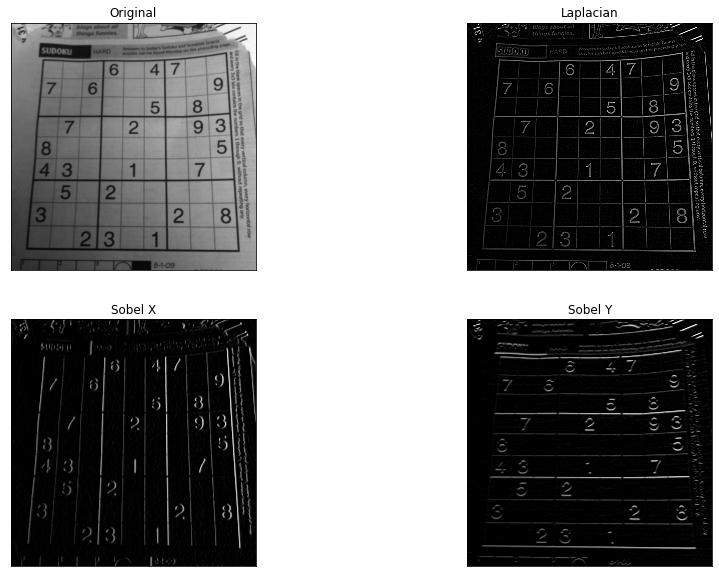

In [18]:
img = cv2.imread('data/sudokubig.jpg', cv2.IMREAD_GRAYSCALE)
 
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
 
plt.figure()

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])
plt.clim([0, 45])

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])
plt.clim([0, 4500])

plt.subplot(2,2,4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])
plt.clim([0, 4500])

### Canny edge detection

Read about the theory here:

https://docs.opencv.org/4.0.0/da/d22/tutorial_py_canny.html

In [ ]:
img = cv2.imread('data/messi.jpg', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(img, 100, 200)
 
plt.figure()

plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Edge Image')
plt.imshow(edge, cmap='gray')

### Morphological Operations

Modifying binary masks

Read about the different operations here:

https://docs.opencv.org/4.0.0/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0

In [ ]:
# Create a doughnut/circle image/mask of 0's and 1's
yy=mgrid[-1:1:0.01,-1:1:0.01][0]
xx=yy.T
circ = 0*xx
circ [xx**2+yy**2 < 0.5**2 ]=1
circ [xx**2+yy**2 < 0.2**2 ]=0
 
# Many different kernel types depending on application
# Let's just stick with a simple box kernel
kernel = ones((10,10), float32)

# Now let's try the some of the different morphological operations
erosion = cv2.erode(circ, kernel, iterations=1)

dilation = cv2.dilate(circ, kernel, iterations=1)

floodfilled = cv2.floodFill(image=circ.astype(uint8).copy(), mask=None, seedPoint=(100,100), newVal=1)
 
plt.figure()

plt.subplot(1,4,1)
plt.title('doughnut')
plt.imshow(circ, cmap='gray')

plt.subplot(1,4,2)
plt.title('eroded')
plt.imshow(erosion, cmap='gray')

plt.subplot(1,4,3)
plt.title('dilated')
plt.imshow(dilation, cmap='gray')

plt.subplot(1,4,4)
plt.title('flood-filled')
plt.imshow(floodfilled[1].astype(float32), cmap='gray')

### Adaptive Thresholding

Compare hard thresholding to adaptive thresholding

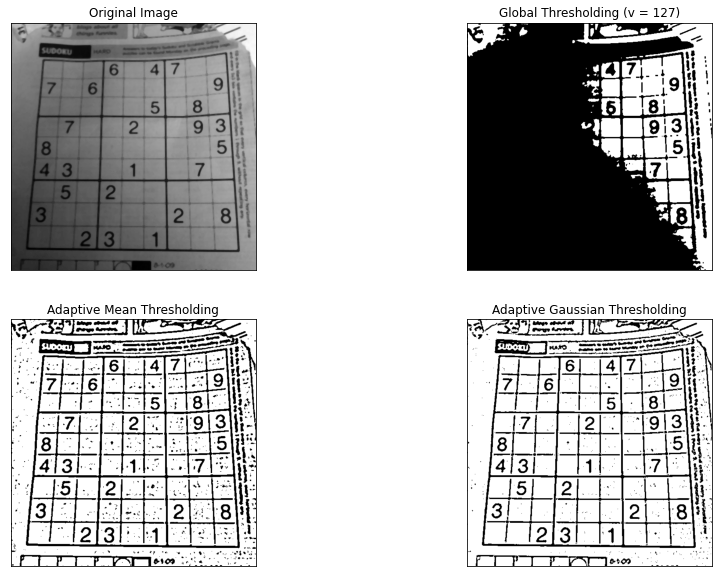

In [19]:
img = cv2.imread('data/sudokubig.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 5)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure()
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2,2,i+1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])